<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW1/4105_HW1_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Defining Functions used

In [2]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [3]:
def gradient_descent(X, y, theta, alpha, iterations, XV, yV): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
  vCost_history = np.zeros(iterations)
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)  
    vCost_history[i] = compute_cost(XV,yV, theta) 
 
  return theta, cost_history, vCost_history

Reading Housing Dataset

In [4]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head() # To get first n rows from the dataset default value of n is 5 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
varlist = ['mainroad', 'guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']

# Defining the mapping function
def binary_map(x):
  return x.map({'yes':1,'no':0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Splitting into 80% Training and 20% Validation sets

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
print("Total: ", len(housing), "Training: ", len(df_train)," Validation: ", len(df_test))

Total:  545 Training:  436  Validation:  109


Change this to test other variables

In [7]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [8]:
Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()
X_Train.head()

,area,bedrooms,bathrooms,stories,parking
542,3620,2,1,1,0
496,4000,2,1,1,0
484,3040,2,1,1,0
507,3600,2,1,1,0
252,9860,3,1,1,0


In [9]:
Y_Train.head()

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [10]:
YV = Y_Test.values
XV = X_Test.values

X = X_Train.values
X

array([[3620,    2,    1,    1,    0],
       [4000,    2,    1,    1,    0],
       [3040,    2,    1,    1,    0],
       ...,
       [5750,    3,    2,    4,    1],
       [3600,    3,    1,    1,    1],
       [6600,    3,    1,    1,    0]])

Variable for Explanatory Variable and Creating Matrix for Gradient Descent

In [11]:
y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

Training

In [12]:
# Learning Rate
alpha = 1e-8; 

In [13]:
theta = np.zeros(X.shape[1])
iterations = 30; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

Final value of theta = [2.45176737e-01 8.61024923e+02 8.29910454e-01 4.12819522e-01
 6.11370360e-01 2.19075081e-01]
cost_history = [7.17754171e+12 4.30235563e+12 2.93763989e+12 2.28987343e+12
 1.98240912e+12 1.83647023e+12 1.76719988e+12 1.73432048e+12
 1.71871415e+12 1.71130654e+12 1.70779048e+12 1.70612155e+12
 1.70532936e+12 1.70495333e+12 1.70477482e+12 1.70469007e+12
 1.70464983e+12 1.70463070e+12 1.70462161e+12 1.70461727e+12
 1.70461519e+12 1.70461418e+12 1.70461368e+12 1.70461342e+12
 1.70461328e+12 1.70461319e+12 1.70461313e+12 1.70461308e+12
 1.70461303e+12 1.70461299e+12]
Final Cost: 1704612992408.6914


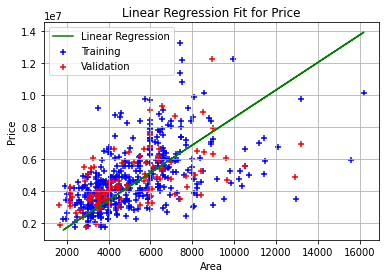

In [14]:
plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Cost = 1704612992408.6914


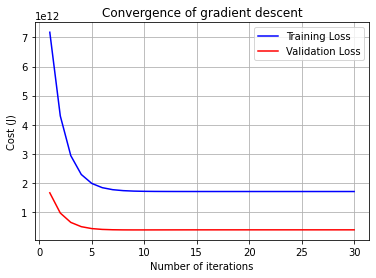

In [15]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Cost =', cost_history[-1]) 

In [16]:
# Part b of problem 1

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking','prefarea', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-8; 


# Training
theta = np.zeros(X.shape[1])
iterations = 30; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

Final value of theta = [2.45176722e-01 8.61024870e+02 8.29910409e-01 4.12819502e-01
 6.11370331e-01 2.21853051e-01 7.66391219e-02 1.27023253e-01
 2.62526961e-02 1.44553874e-01 2.19075070e-01 9.09276288e-02]
cost_history = [7.17754150e+12 4.30235541e+12 2.93763970e+12 2.28987328e+12
 1.98240898e+12 1.83647011e+12 1.76719977e+12 1.73432037e+12
 1.71871404e+12 1.71130643e+12 1.70779036e+12 1.70612143e+12
 1.70532924e+12 1.70495320e+12 1.70477470e+12 1.70468994e+12
 1.70464969e+12 1.70463057e+12 1.70462147e+12 1.70461712e+12
 1.70461504e+12 1.70461403e+12 1.70461353e+12 1.70461327e+12
 1.70461312e+12 1.70461303e+12 1.70461296e+12 1.70461291e+12
 1.70461286e+12 1.70461282e+12]
Final Cost: 1704612817138.8916


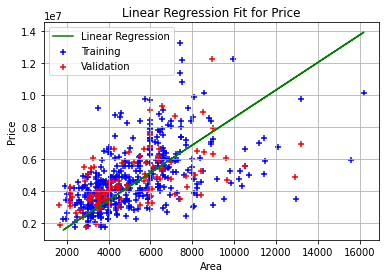

In [17]:
plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Cost = 1704612817138.8916


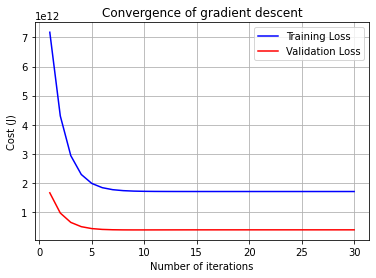

In [18]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Cost =', cost_history[-1]) 

### Question 2

In [19]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [20]:
def gradient_descent(X, y, theta, alpha, iterations, XV, yV): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
  vCost_history = np.zeros(iterations)
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)  
    vCost_history[i] = compute_cost(XV,yV, theta) 
 
  return theta, cost_history, vCost_history

Reading Housing Dataset

In [21]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head() # To get first n rows from the dataset default value of n is 5 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
varlist = ['mainroad', 'guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']

# Defining the mapping function
def binary_map(x):
  return x.map({'yes':1,'no':0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Splitting into 80% Training and 20% Validation sets

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
print("Total: ", len(housing), "Training: ", len(df_train)," Validation: ", len(df_test))

Total:  545 Training:  436  Validation:  109


Change this to test other variables

In [24]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


Input Normalization/Standardization Here

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,0.0,0.239394


In [26]:
Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()
X_Train.head()

,area,bedrooms,bathrooms,stories,parking
542,0.124199,0.2,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,0.0


In [27]:
Y_Train.head()

542    0.000000
496    0.081818
484    0.096970
507    0.072727
252    0.239394
Name: price, dtype: float64

In [28]:
YV = Y_Test.values
XV = X_Test.values

X = X_Train.values
y = Y_Train.values  # get output values from fourth column 

In [29]:
m = len(y) # Number of training examples 
#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 
# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

Training

In [30]:
# Learning Rate
alpha = 1e-1; 

In [31]:
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

Final value of theta = [0.06198209 0.28386156 0.10038414 0.20686427 0.1410527  0.1197912 ]
Final Cost: 0.006307785094029491


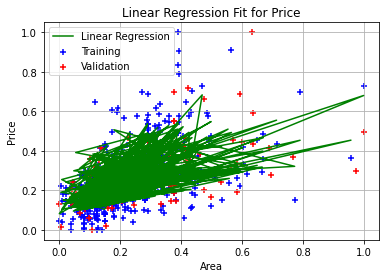

In [32]:
plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.001294880828301084


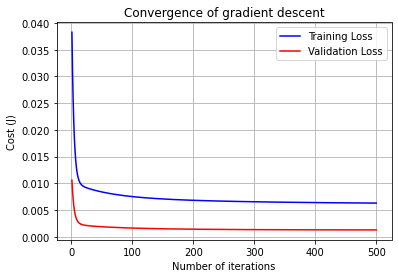

In [33]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 

Standardization

In [34]:
# Standard P2

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-1; 


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

Final value of theta = [2.71953713e-16 3.88481823e-01 8.90638389e-02 3.04158794e-01
 2.40439813e-01 1.60108157e-01]
Final Cost: 0.22309632352685566


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


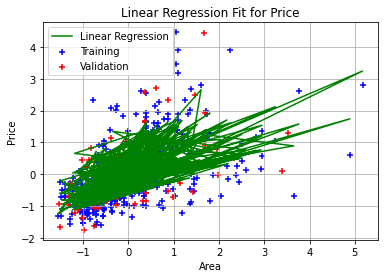

In [35]:
plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.048621539286804974


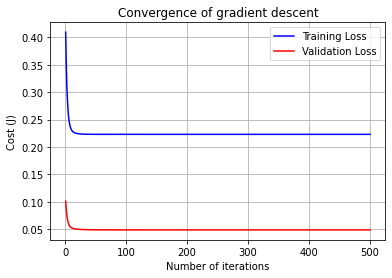

In [36]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 

### **Part B**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Final value of theta = [0.01098462 0.19316339 0.06927606 0.17645366 0.11144087 0.04694848
 0.04337007 0.02608232 0.0900331  0.08201535 0.08575685 0.07132222]
Final Cost: 0.004621606126607082


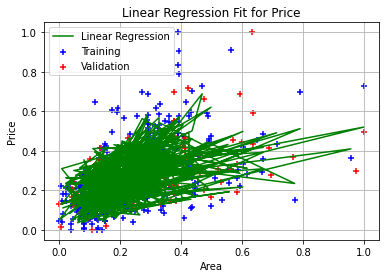

In [37]:
# Scaling Normalization

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking','prefarea', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-1; 


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Cost = 0.0011247653486832693


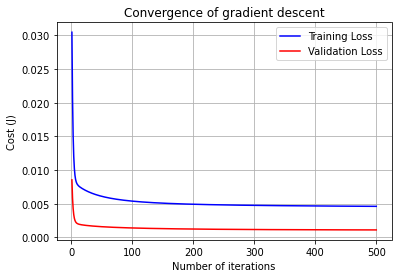

In [38]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Cost =', vCost_history[-1]) 

Final value of theta = [2.61157049e-16 2.86802300e-01 5.66977841e-02 2.60175343e-01
 2.00694996e-01 8.59288752e-02 8.77004232e-02 8.75035985e-02
 1.26523800e-01 2.19592259e-01 1.11768608e-01 1.60270222e-01]
Final Cost: 0.16415712662209145


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


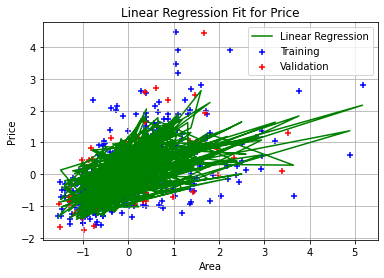

In [39]:
# Standardization

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking','prefarea', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-1; 


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.03995373443299149


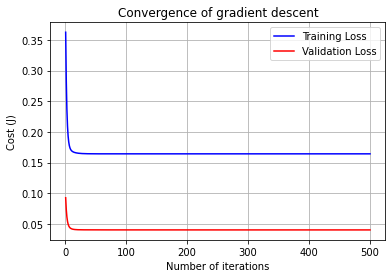

In [40]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 

### Question 3

In [41]:
def compute_cost(X, y, theta, lambda_value): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * (np.sum(sqrErrors) + lambda_value * np.sum(np.square(theta)))
 
  return J 

In [42]:
def gradient_descent(X, y, theta, alpha, iterations, XV, yV, lambda_value): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
  vCost_history = np.zeros(iterations)
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors) + (lambda_value / m) * theta; 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta, lambda_value)  
    vCost_history[i] = compute_cost(XV,yV, theta, lambda_value) 
 
  return theta, cost_history, vCost_history

Reading Housing Dataset

In [43]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head() # To get first n rows from the dataset default value of n is 5 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
varlist = ['mainroad', 'guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']

# Defining the mapping function
def binary_map(x):
  return x.map({'yes':1,'no':0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Splitting into 80% Training and 20% Validation sets

In [45]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
print("Total: ", len(housing), "Training: ", len(df_train)," Validation: ", len(df_test))

Total:  545 Training:  436  Validation:  109


Change this to test other variables

Final value of theta = [2.55527299e-16 3.76694680e-01 9.85653835e-02 2.96066047e-01
 2.32450181e-01 1.62762701e-01]
Final Cost: 0.22327066921450245


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


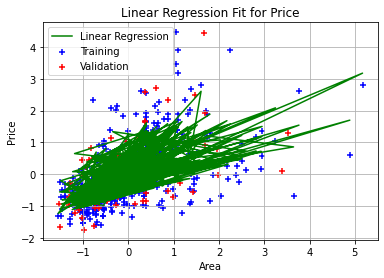

In [46]:
# Standardization


num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-2; 

# Lambda
lambda_value = 1e-1;


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV, lambda_value) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.04896552682468627


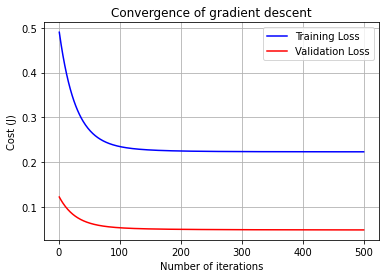

In [47]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 

### Part B

Final value of theta = [2.50257244e-16 2.76837030e-01 6.73777643e-02 2.54174737e-01
 1.92128329e-01 8.83884054e-02 9.03391178e-02 8.21979133e-02
 1.20754303e-01 2.16268678e-01 1.15440057e-01 1.59753189e-01]
Final Cost: 0.16432522866602073


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


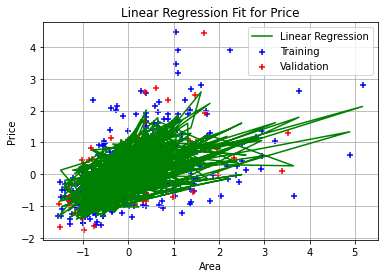

In [48]:
# Standardization


num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking','prefarea', 'price']

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])

Y_Test = df_Newtest.pop('price')
X_Test = df_Newtest.copy()

Y_Train = df_Newtrain.pop('price')
X_Train = df_Newtrain.copy()

YV = Y_Test.values
XV = X_Test.values

X = X_Train.values

y = Y_Train.values  # get output values from fourth column 
m = len(y) # Number of training examples 

#Lets create a matrix with single column of ones 
Ones = np.ones((m, 1)) 

# This will be our final X matrix (feature matrix) 
X = np.hstack((Ones, X)) 

mv = len(YV) # Number of training examples 

#Lets create a matrix with single column of ones 
Onesv = np.ones((mv, 1)) 
XV = np.hstack((Onesv,XV))

# Learning Rate
alpha = 1e-2; 

# Lambda
lambda_value = 1e-1;


# Training
theta = np.zeros(X.shape[1])
iterations = 500; 




theta, cost_history,vCost_history = gradient_descent(X, y, theta, alpha, iterations, XV, YV, lambda_value) 
print('Final value of theta =', theta) 
#print('cost_history =', cost_history) 
print('Final Cost:', cost_history[-1])

plt.scatter(X[:,1], y, color='blue', marker= '+', label= 'Training') 
plt.scatter(XV[:,1], YV, color='red', marker= '+', label= 'Validation') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 


#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Area') 
plt.ylabel('Price') 
plt.title('Linear Regression Fit for Price') 
plt.legend() 

Final Validation Cost = 0.04016637939672736


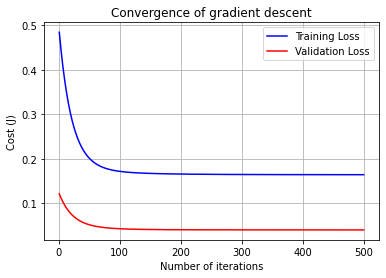

In [49]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label = 'Training Loss') 
plt.plot(range(1, iterations + 1),vCost_history, color='red', label = 'Validation Loss') 
#plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 
plt.legend()
print('Final Validation Cost =', vCost_history[-1]) 